<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch4_RombergIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Romberg Integration
### The idea of Richardson extrapolation
If $N(h)$ is a method that tries to compute some answer $M$, and $\lim_{h\to 0}N(h)=M$, and in particular, if
$$N(h)=M + ch^{\alpha} + o(h^\alpha)$$
for some constant $c$, then we can create an extrapolated version
$$R(h) = N(h) + \frac{N(h)-N(qh)}{q^{\alpha}-1}=(q^\alpha-1)\left(q^\alpha N(h) - N(qh)\right)$$
where $q$ is up to us (almost always $q=2$).  Note that sometimes we call this $R(qh)$ -- what we call it doesn't really matter as long as we don't get confused.

### Repeated Richardson extrapolation
We'll then extrapolate $R$. To do this, we need to know
$$R(h) = M + c_2h^{\alpha_2} + o(h^{\alpha_2})
$$
and so to know $\alpha_2$, we usually look back at the original $N(h)$ and ask for a more complete expansion
$$N(h)=M + ch^{\alpha} + c_2h^{\alpha_2} + c_3h^{\alpha_3} +\ldots$$
Usually we have the pattern $\alpha_{j+1} = \alpha_{j}+1$, but sometimes we have the pattern $\alpha_{j+1} = \alpha_{j}+2$ (e.g., for the trapezoidal rule) which is often due to symmetries that cause odd powers of $h$ to cancel.

### We'll start by setting up our composite integration routines
These are taken from previous demo notebooks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})


def CompositeMidpoint( f, a, b, n ):
  h   = (b-a)/(n+1)  # this is \tilde{h} in the notes
  nodes = np.arange( a+h/2, b, step=h)
  return h*np.sum(f(nodes))

def CompositeTrapezoidal( f, a, b, n):
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y  = f(nodes)
  return h*( np.sum(y) - (y[0]+y[-1])/2) # y[-1] is last element; in Matlab, this is y(end)

def CompositeSimpson( f, a, b, n):
  n = int(n/2)*2  # Make it even
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y = f(nodes)
  return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] ) # in Matlab, it is a:step:b whereas in Python it is a:b:step and not inclusive of b

### and setup a function to integrate

Integral I is 1.751


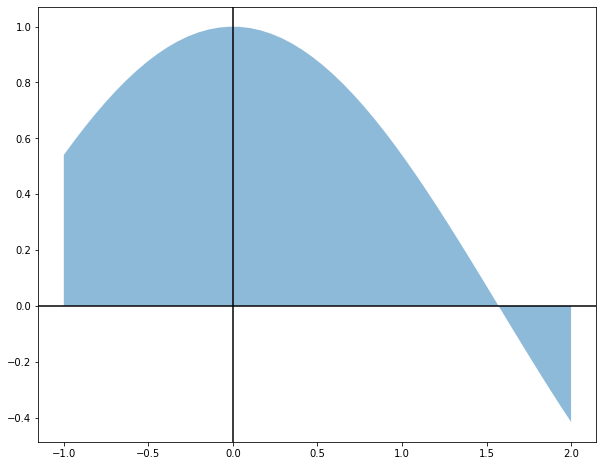

In [ ]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2

I   = F(b) - F(a)
print("Integral I is {:.3f}".format(I))

x = np.linspace(a,b)
plt.figure(figsize=(10,8)) 
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');


### Now define our Romberg method, specialized to the Trapezoidal rule

In [ ]:
def RombergAppliedToTrapezoidal(f,a,b,nRows):
  n = 2
  table = []
  for i in range(nRows):
    I = CompositeTrapezoidal(f,a,b,n)
    newRow = [I]
    if i > 0:
      oldRow = table[-1]
    for j in range(i):
      qj = 4**(j+1)
      newRow.append(  (qj*newRow[-1] - oldRow[j])/( qj-1) )
    table.append(newRow)
    n *= 2
  return table

In [ ]:
table = RombergAppliedToTrapezoidal(f,a,b,8)
for row in table:
  for entry in row:
    print("{:.2e}  ".format(abs(entry-I)),end="") # suppress new line
  print("") # new line

3.41e-01  
8.28e-02  3.30e-03  
2.06e-02  1.96e-04  1.11e-05  
5.13e-03  1.21e-05  1.64e-07  9.78e-09  
1.28e-03  7.52e-07  2.53e-09  3.61e-11  2.17e-12  
3.21e-04  4.70e-08  3.94e-11  1.39e-13  1.78e-15  2.22e-16  
8.01e-05  2.94e-09  6.14e-13  4.44e-16  0.00e+00  0.00e+00  0.00e+00  
2.00e-05  1.83e-10  9.77e-15  2.22e-16  2.22e-16  2.22e-16  2.22e-16  2.22e-16  
